In [1]:
library("ggplot2")
library("ggpubr")
library("scales")
library("reshape2")
library("ggpattern")

library("pracma")
library("ggplot2")
library("gghalves")
library("ggbeeswarm")
set.seed(2023)

# Tensor Correlation

In [2]:
PBMC.fig.list  = readRDS("../Figure/Simulation-PBMC/decon.L1.max_stds.2/RNA_Simulation-PBMC_decon.L1_500_fig.list.rds")
reinius.fig.list = readRDS("../Figure/Purified-Reinius/hvf.10k/Reinius_eval_hvf.10k_fig.list.rds")
ls(PBMC.fig.list)

[1] "add.box.g"   "covar.bar.g" "legend.g"    "mean.bar.g"  "var.bar.g"  
[6] "Z.corrs.g"

### update legend, lab, title size

In [3]:
k = 5
covar.len = (k * k - k )/2

title.size = 20
lab.size = 20
legend.size = 20  

## this is reinforced in the original code already
# PBMC.fig.list$mean.bar.g = PBMC.fig.list$mean.bar.g +  
#                             theme(legend.text = element_text(size=legend.size)) + 
#                             theme(text=element_text(size=lab.size)) +
#                             theme(plot.title = element_text(hjust = 0.5, size = title.size))


# PBMC.fig.list$var.bar.g = PBMC.fig.list$var.bar.g +  
#                             theme(legend.text = element_text(size=legend.size)) + 
#                             theme(text=element_text(size=lab.size)) +
#                             theme(plot.title = element_text(hjust = 0.5, size = title.size))

# PBMC.fig.list$covar.bar.g = PBMC.fig.list$covar.bar.g +  
#                             theme(legend.text = element_text(size=legend.size)) + 
#                             theme(text=element_text(size=lab.size)) +
#                             theme(plot.title = element_text(hjust = 0.5, size = title.size))

# for (i in 1:k){
#    PBMC.fig.list$Z.corrs.g[[i]] = PBMC.fig.list$Z.corrs.g[[i]] +  
#                                   theme(legend.text = element_text(size=legend.size)) + 
#                                   theme(text=element_text(size=lab.size)) +
#                                   theme(plot.title = element_text(hjust = 0.5, size = title.size))
# }


# PBMC.fig.list$add.box.g = PBMC.fig.list$add.box.g + theme(legend.text = element_text(size=legend.size)) + 
#                                                     theme(text=element_text(size=lab.size)) +
#                                                     theme(plot.title = element_text(hjust = 0.5, size = title.size))


# for (entropy in names(reinius.fig.list$cor.bar.plots)){
#     reinius.fig.list$cor.bar.plots[[entropy]] = reinius.fig.list$cor.bar.plots[[entropy]] + 
#                                                 theme(legend.text = element_text(size=legend.size)) + 
#                                                 theme(text=element_text(size=lab.size)) +
#                                                 theme(plot.title = element_text(hjust = 0.5, size = title.size))
# }

## params

In [4]:
plts = list(3)
plts[[1]] = PBMC.fig.list$mean.bar.g  + theme(legend.position="none") 
plts[[2]] = PBMC.fig.list$var.bar.g   + theme(legend.position="none") + theme(axis.title.y = element_blank()) 
plts[[3]] = PBMC.fig.list$covar.bar.g + theme(legend.position="none") + theme(axis.title.y = element_blank()) 

covar.width   = round(2 * covar.len/k)

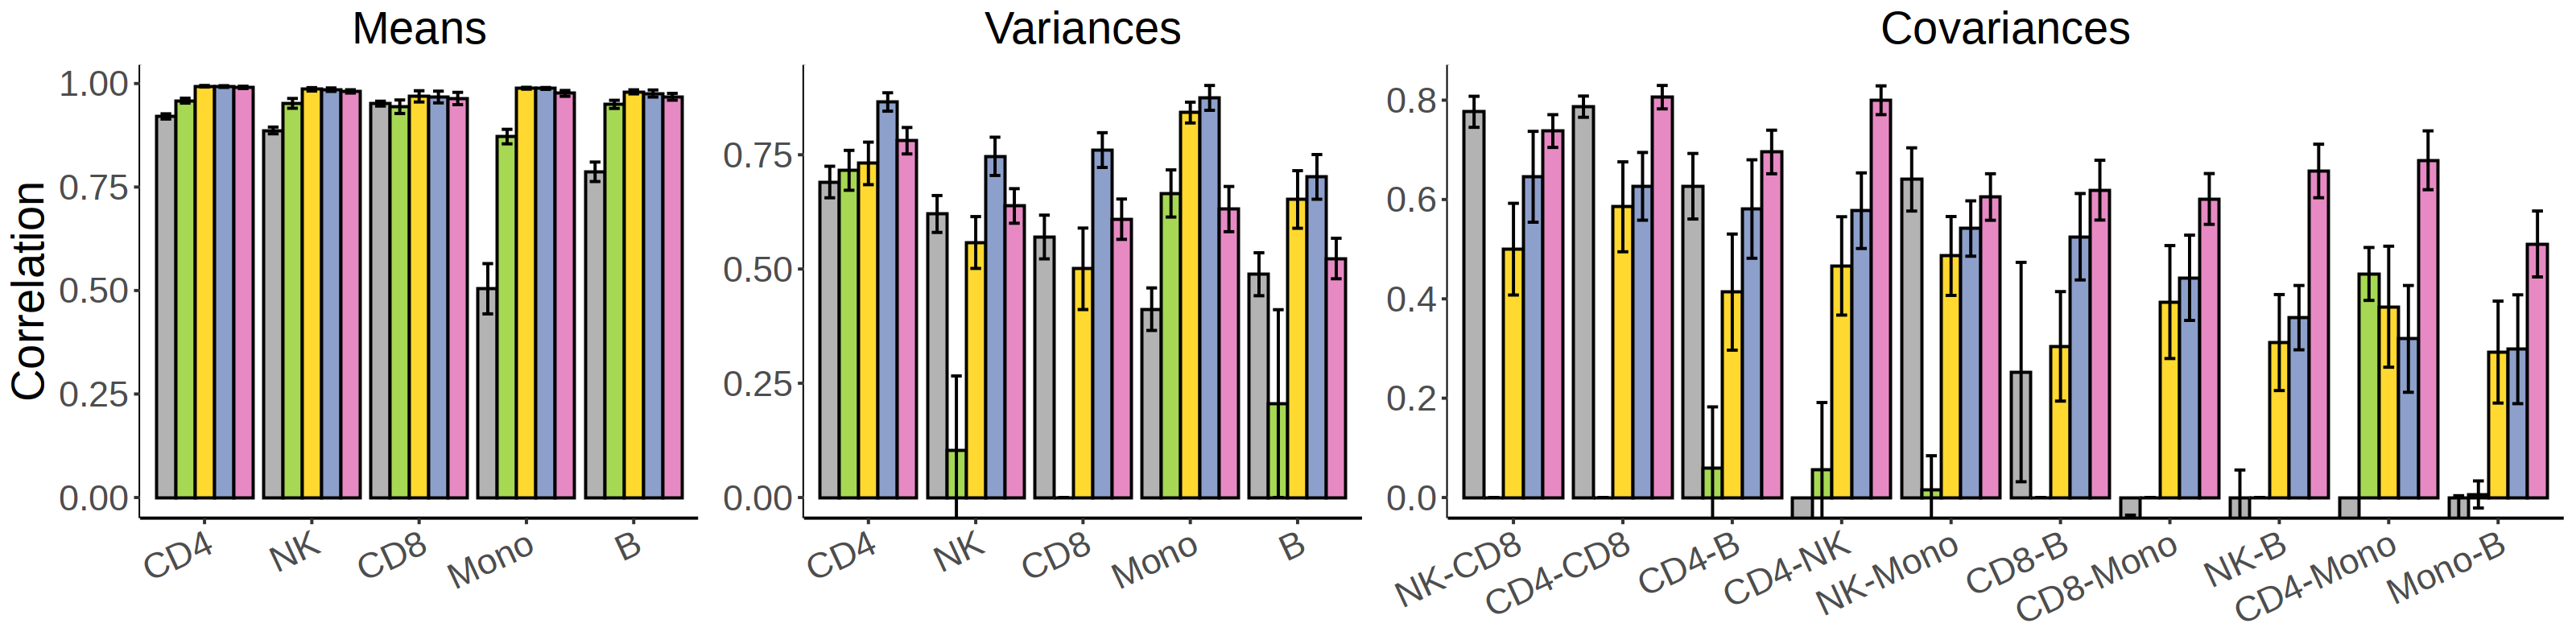

In [5]:
options(repr.plot.width = 16, repr.plot.height = 4, repr.plot.res = 200)
params.bar.g = egg::ggarrange(plots=list(plts[[1]], plts[[2]], plts[[3]]),  
                              align = "h",
                              widths = c(2,2,covar.width))

## Corrs

adding dummy grobs



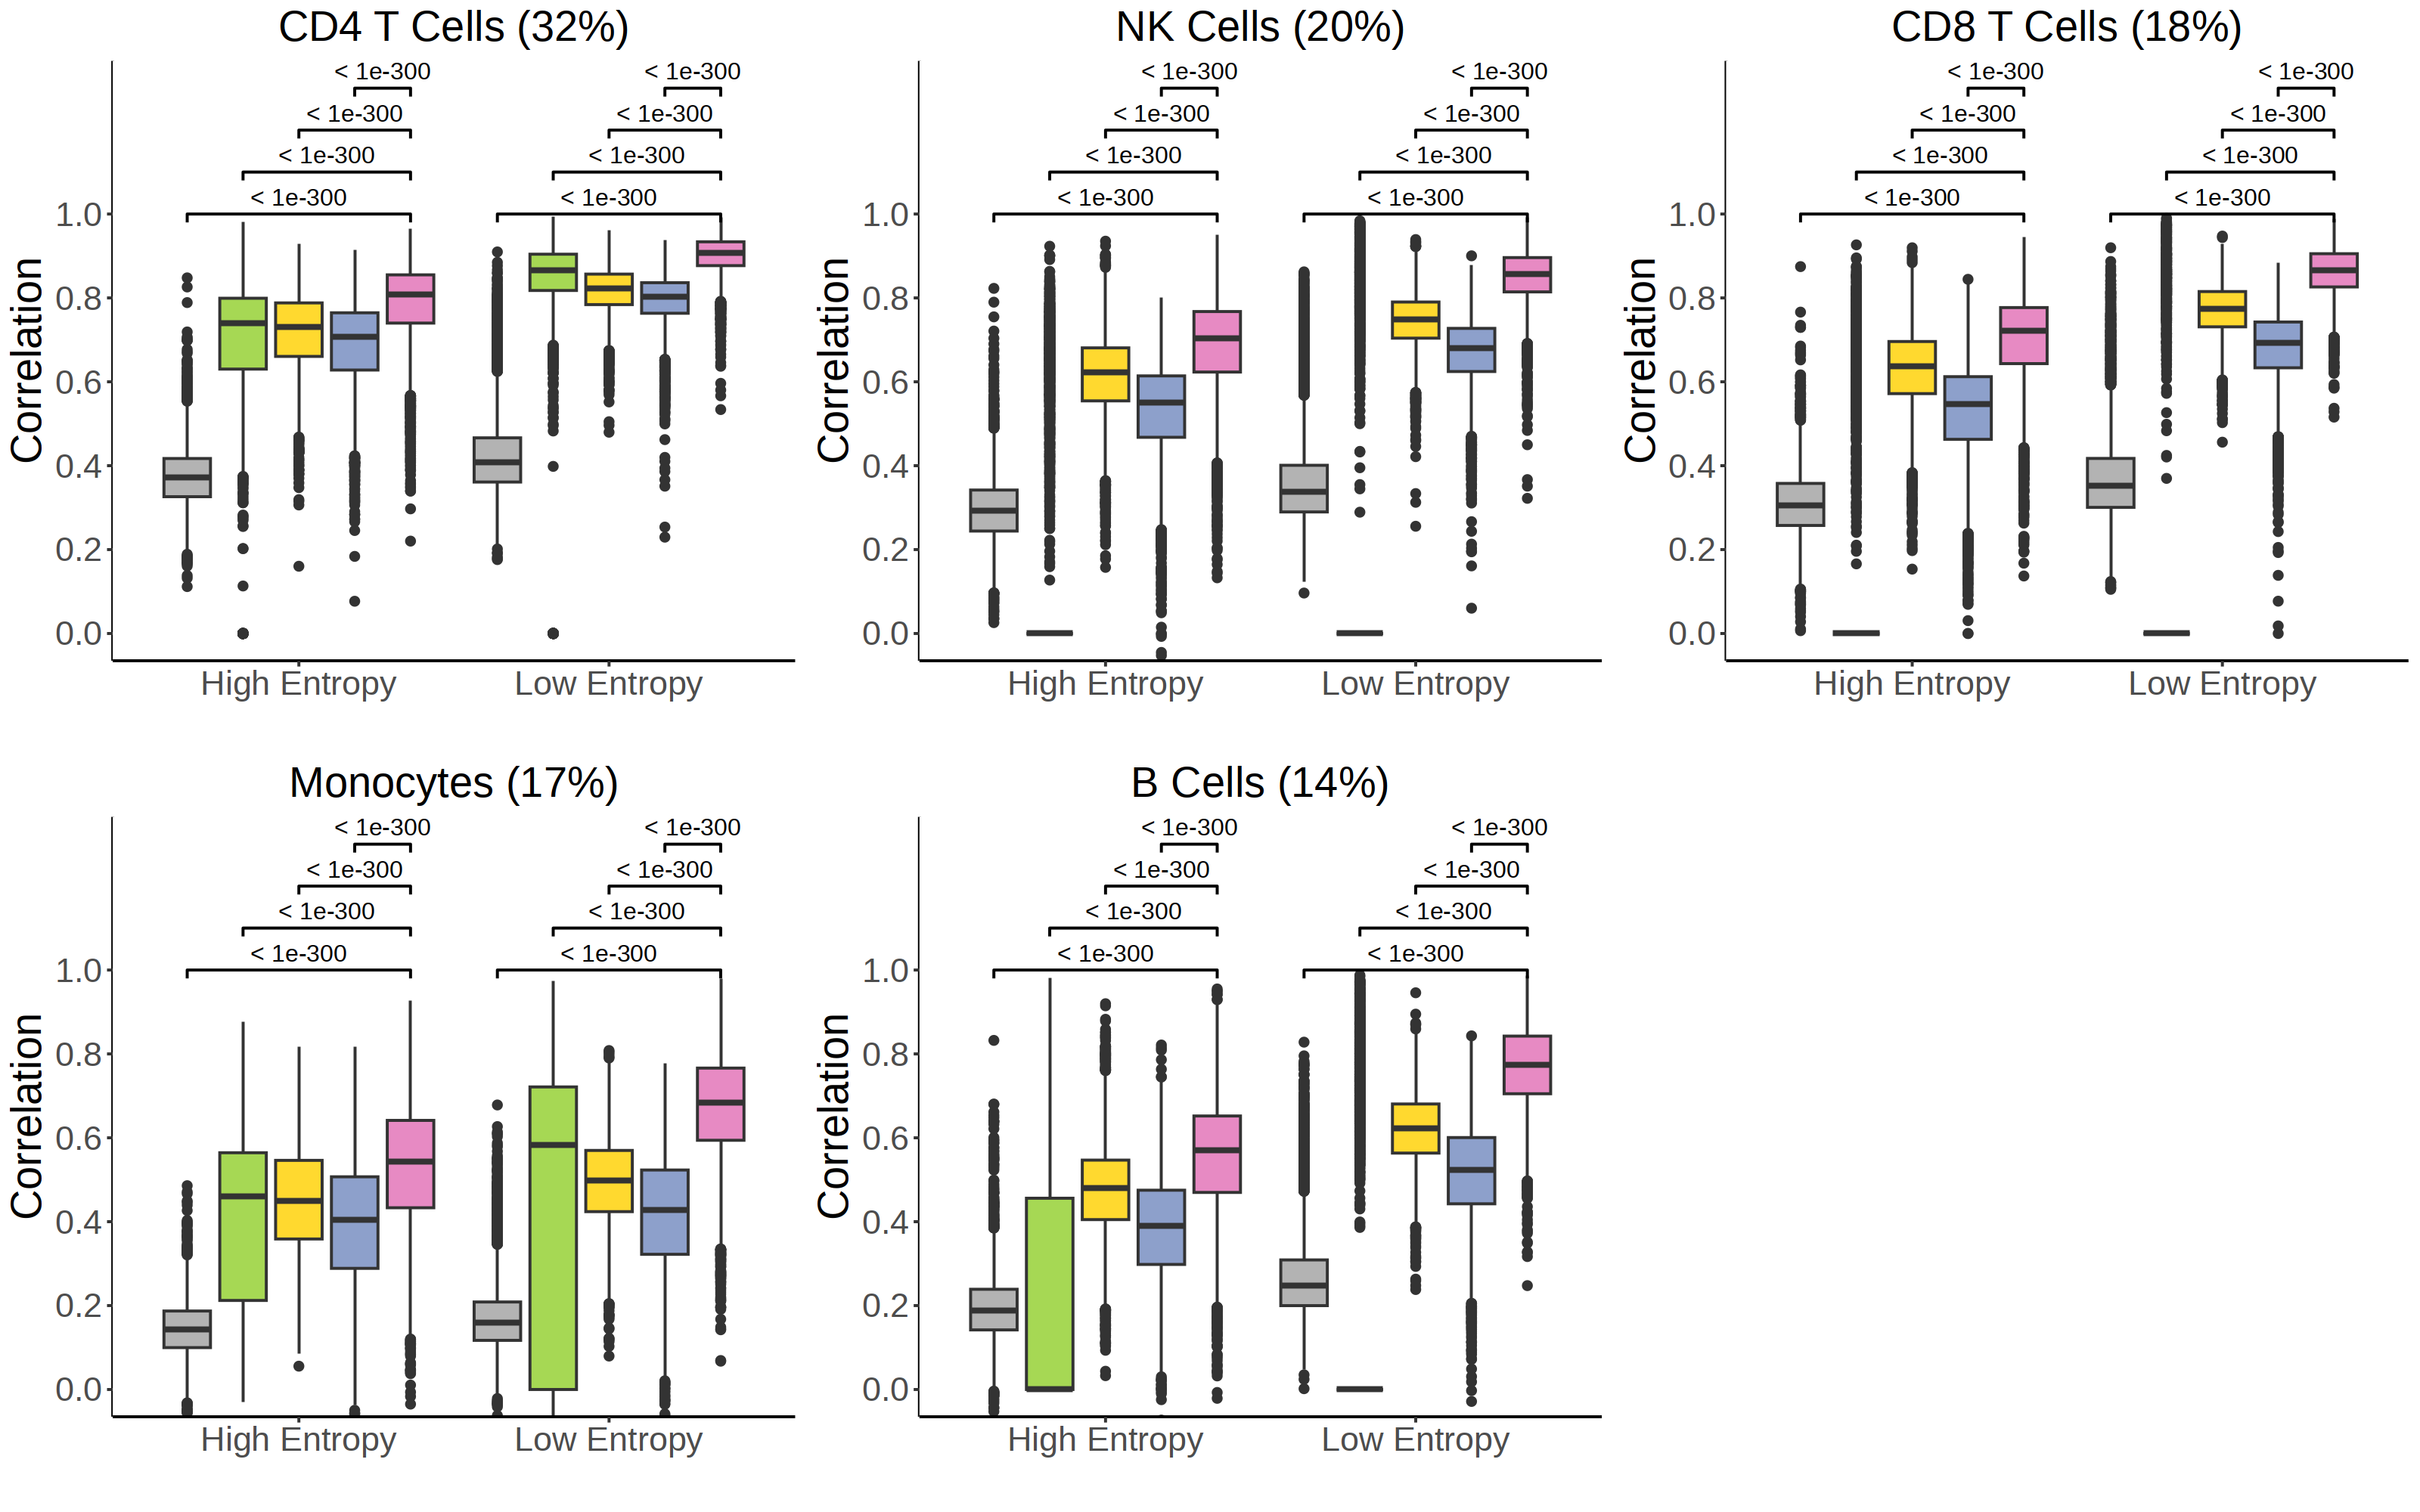

In [6]:
options(repr.plot.width = 16, repr.plot.height = 10, repr.plot.res = 200)
cor.box.g = egg::ggarrange(plots = PBMC.fig.list$Z.corrs.g,
                           align = "h",
                           widths = rep(2, ceil(k/2)),  
                           debug=F)

## add signal

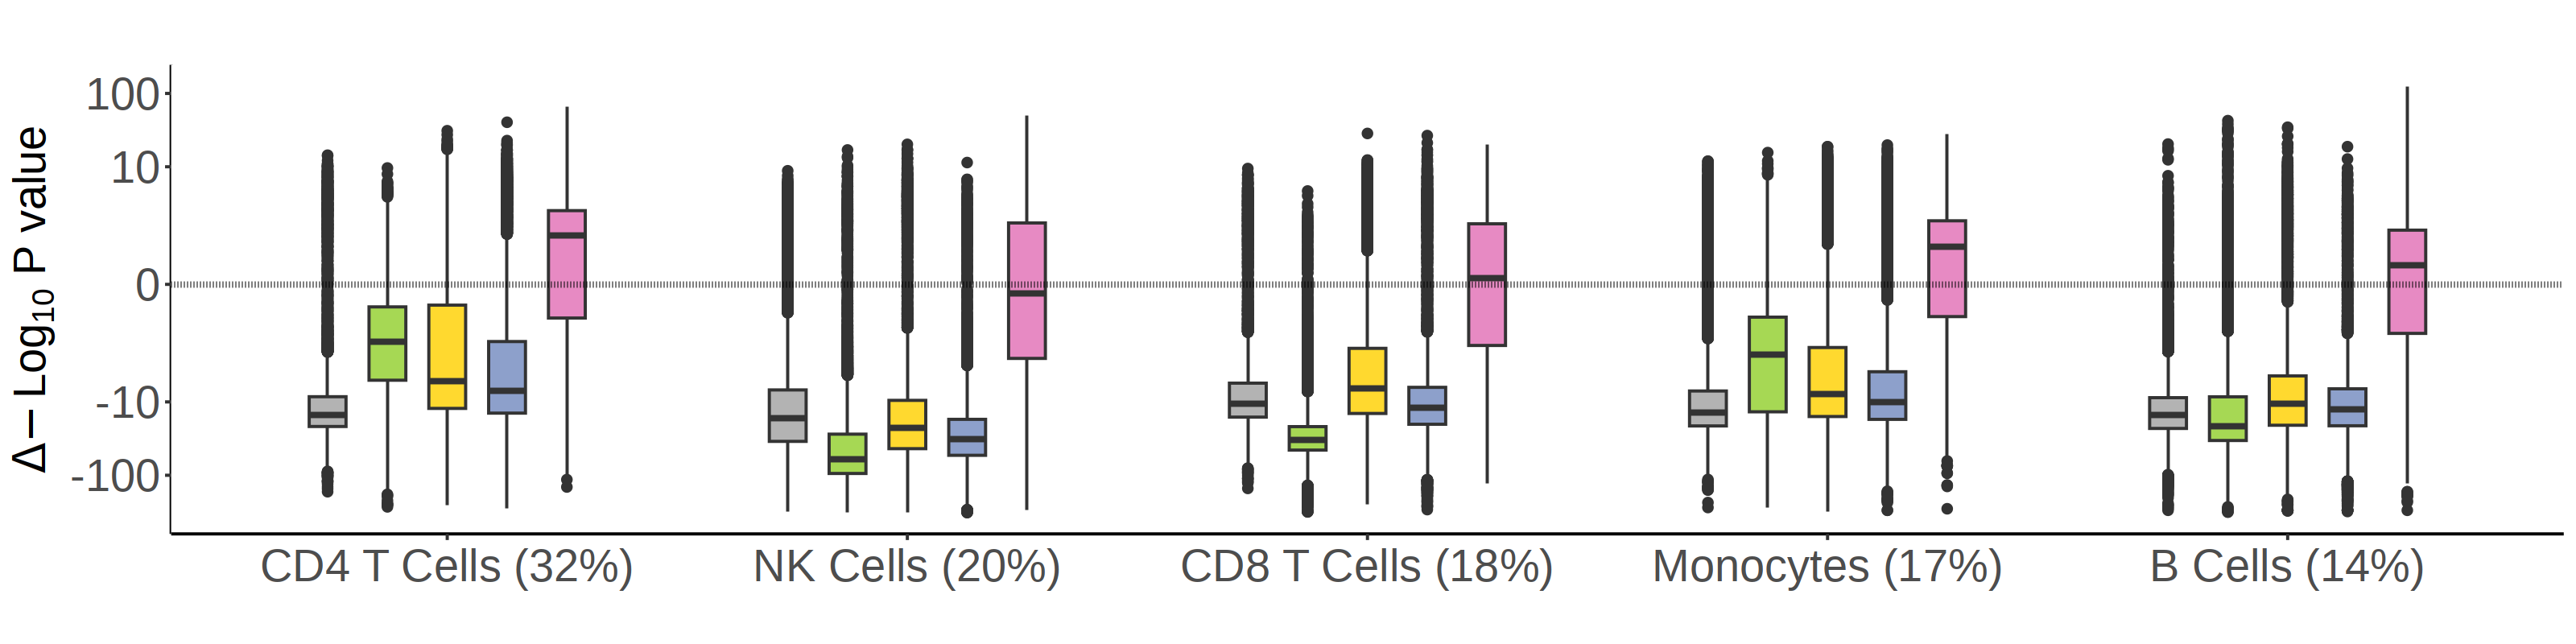

In [7]:
options(repr.plot.width = 16, repr.plot.height = 4, repr.plot.res = 200)
add.box.p  = egg::ggarrange(plots = list(PBMC.fig.list$add.box.g))

## Reinius

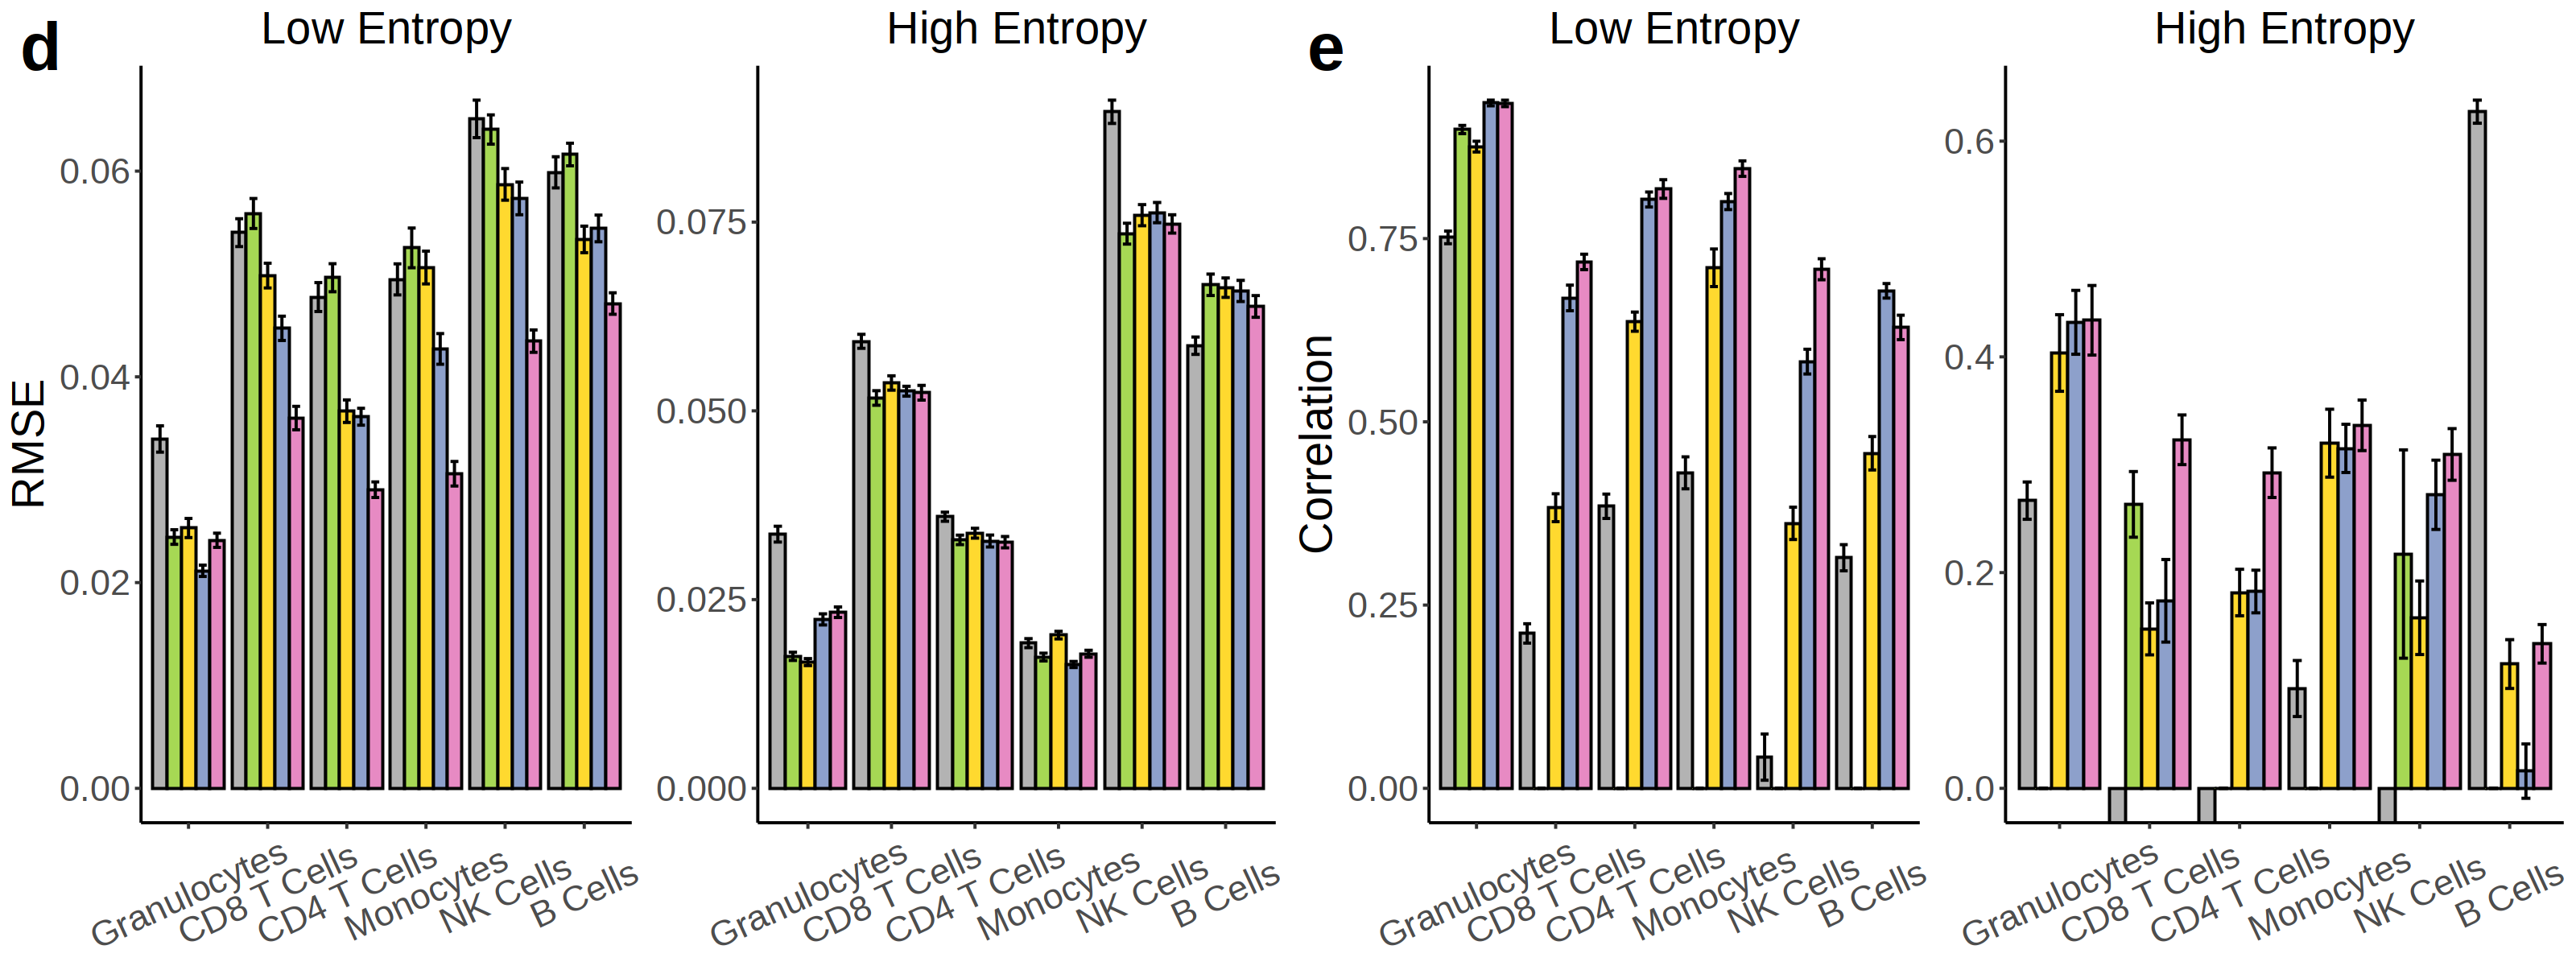

In [8]:
rmse.bar.g = ggarrange(reinius.fig.list$RMedS.bar.plots[["low entropy"]]   + theme(legend.position = "none"),
                       reinius.fig.list$RMedS.bar.plots[["high entropy"]]  + theme(legend.position = "none", axis.title.y = element_blank()),
                       nrow = 1,
                       widths = c(1, 1))
                      

cor.bar.g = ggarrange(reinius.fig.list$cor.bar.plots[["low entropy"]]   + theme(legend.position = "none"),
                      reinius.fig.list$cor.bar.plots[["high entropy"]]  + theme(legend.position = "none", axis.title.y = element_blank()) , 
                      nrow = 1,
                      widths = c(1, 1))
                       
reinius.g = ggarrange(rmse.bar.g, cor.bar.g,
                      nrow = 1,
                      widths = c(1, 1),
                      labels = c("d","e"),
                      font.label = list(size = 30, color = "black", face = "bold", family = NULL))


options(repr.plot.width = 16, repr.plot.height = 6, repr.plot.res = 200)
reinius.g

# Main tensor

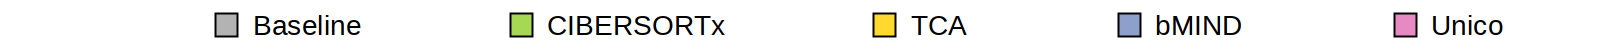

In [9]:
legend.g = as_ggplot(get_legend(PBMC.fig.list$covar.bar.g + 
                                theme(legend.direction = "horizontal",
                                      legend.position = c(0.575, 0.5),
                                      legend.text = element_text(size=legend.size, 
                                                                 margin = margin(r = 100, unit = "pt"))))) 


options(repr.plot.width = 16, repr.plot.height = 0.5, repr.plot.res = 100)
legend.g 

In [10]:
main.tensor.g = ggarrange(legend.g,
                          params.bar.g, 
                          cor.box.g,
                          add.box.p,
                          reinius.g,
                          nrow = 5, 
                          labels = c("", "a", "b", "c"),
                          heights = c(0.15, 1.125, 2.25, 0.9, 1.125),
                          font.label = list(size = 30, color = "black", face = "bold", family = NULL)) 

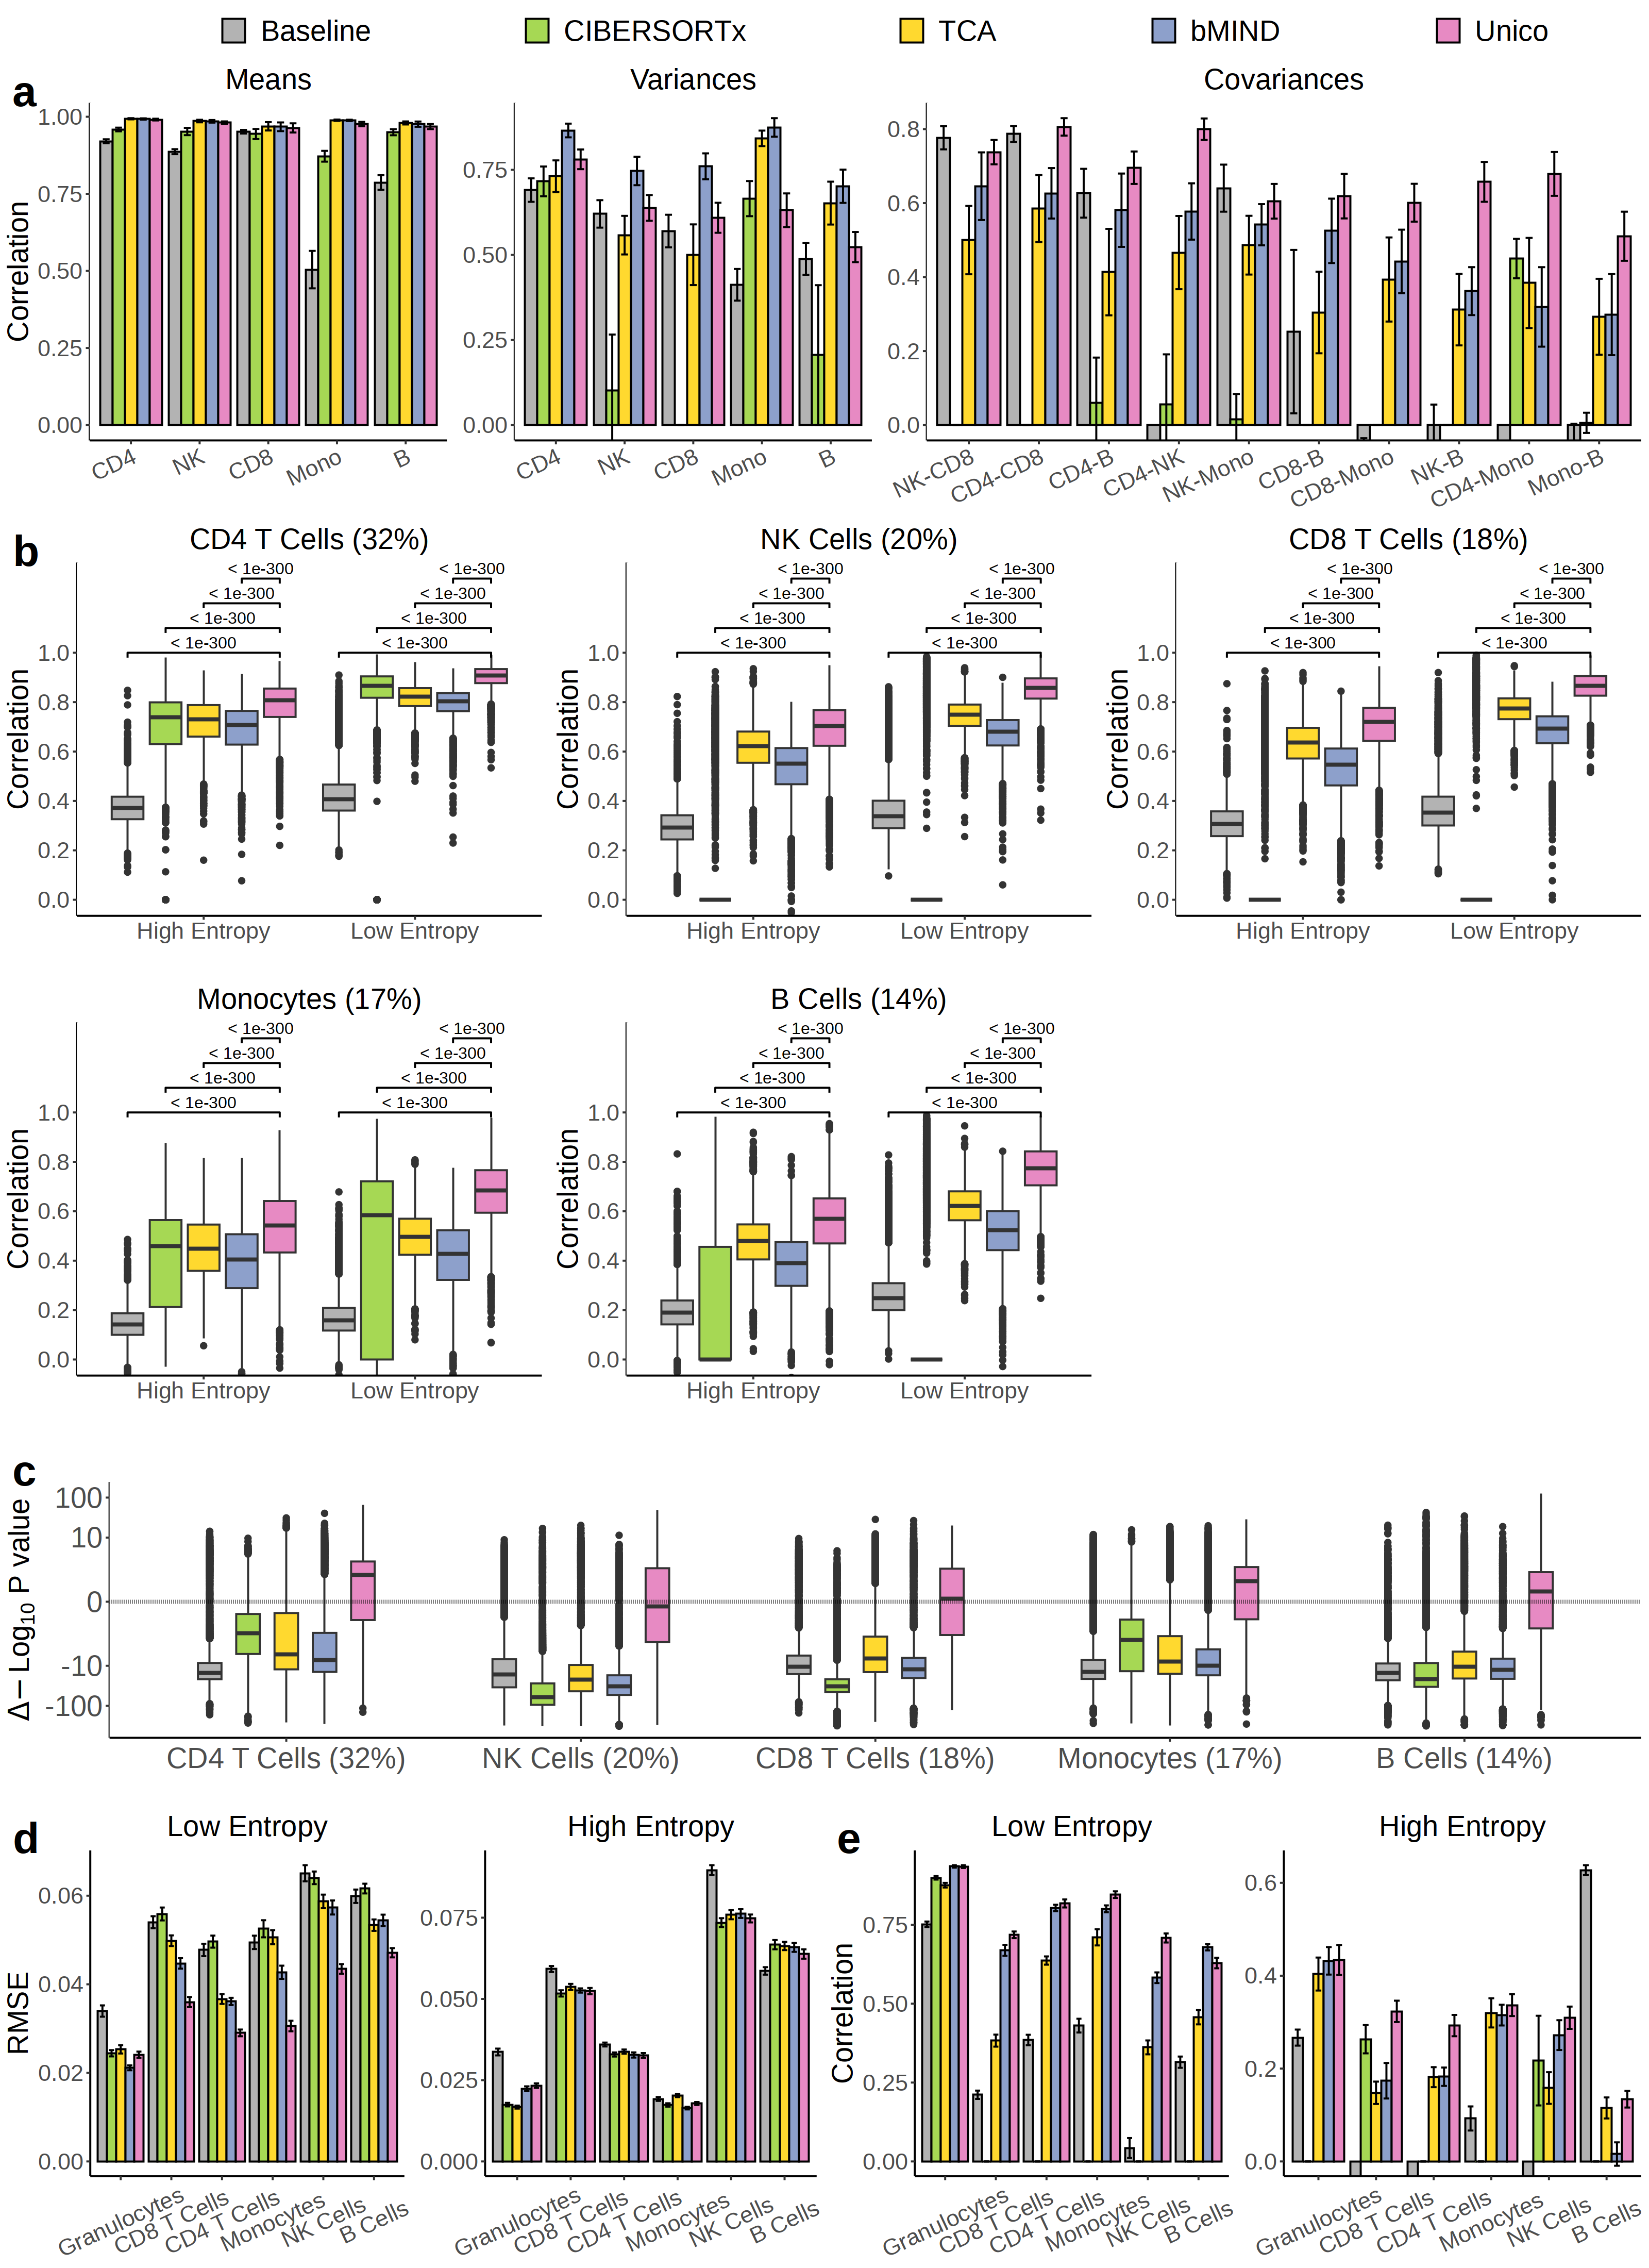

In [11]:
options(repr.plot.width = 16, repr.plot.height = 22, repr.plot.res = 200)
main.tensor.g 

In [12]:
ggsave("../Figure/Main.tensor.result.pdf", main.tensor.g,
       bg = 'white',
       device = "pdf", width = 16, height = 22, dpi = 600)

# Downstream

In [13]:
rna.fig.list  = readRDS("../Figure/CREBBP/CREBBP_fig.list.rds")
meth.fig.list = readRDS("../Figure/EWAS-Consistency/Consistency.MCC.fig.list.rds")

Warning message:
“Using the `size` aesthetic in this geom was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` in the `default_aes` field and elsewhere instead.”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”


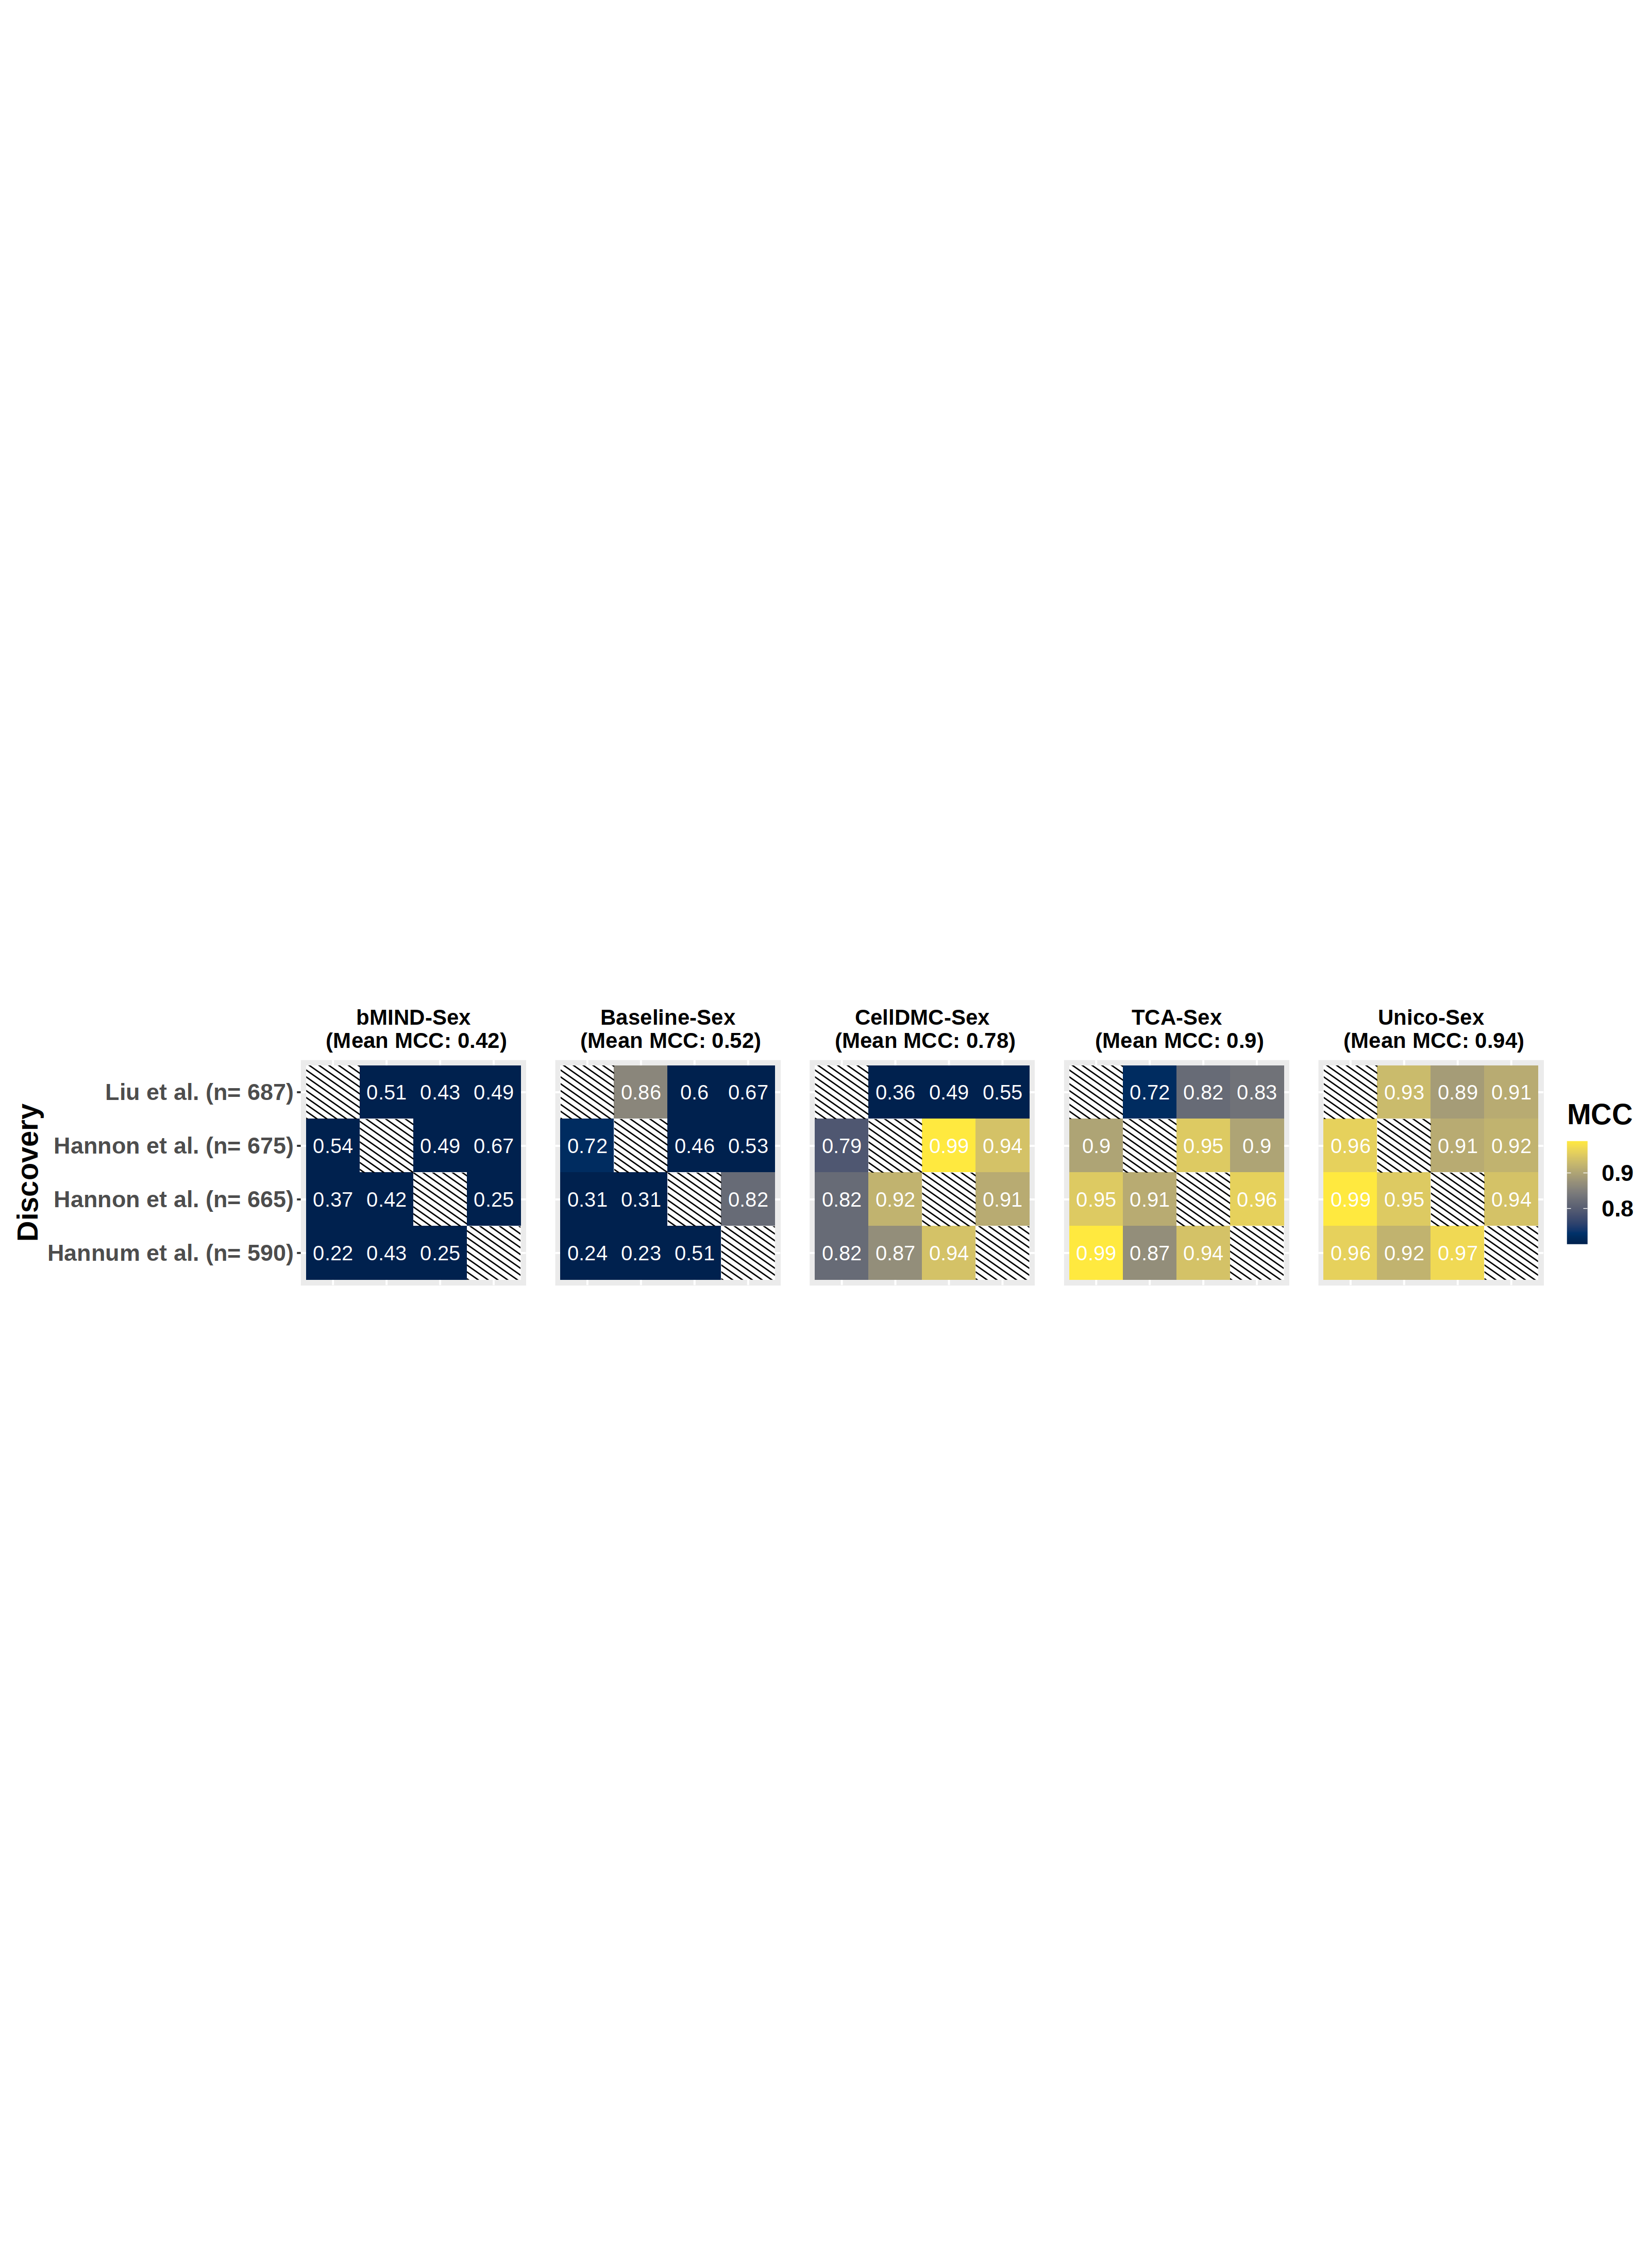

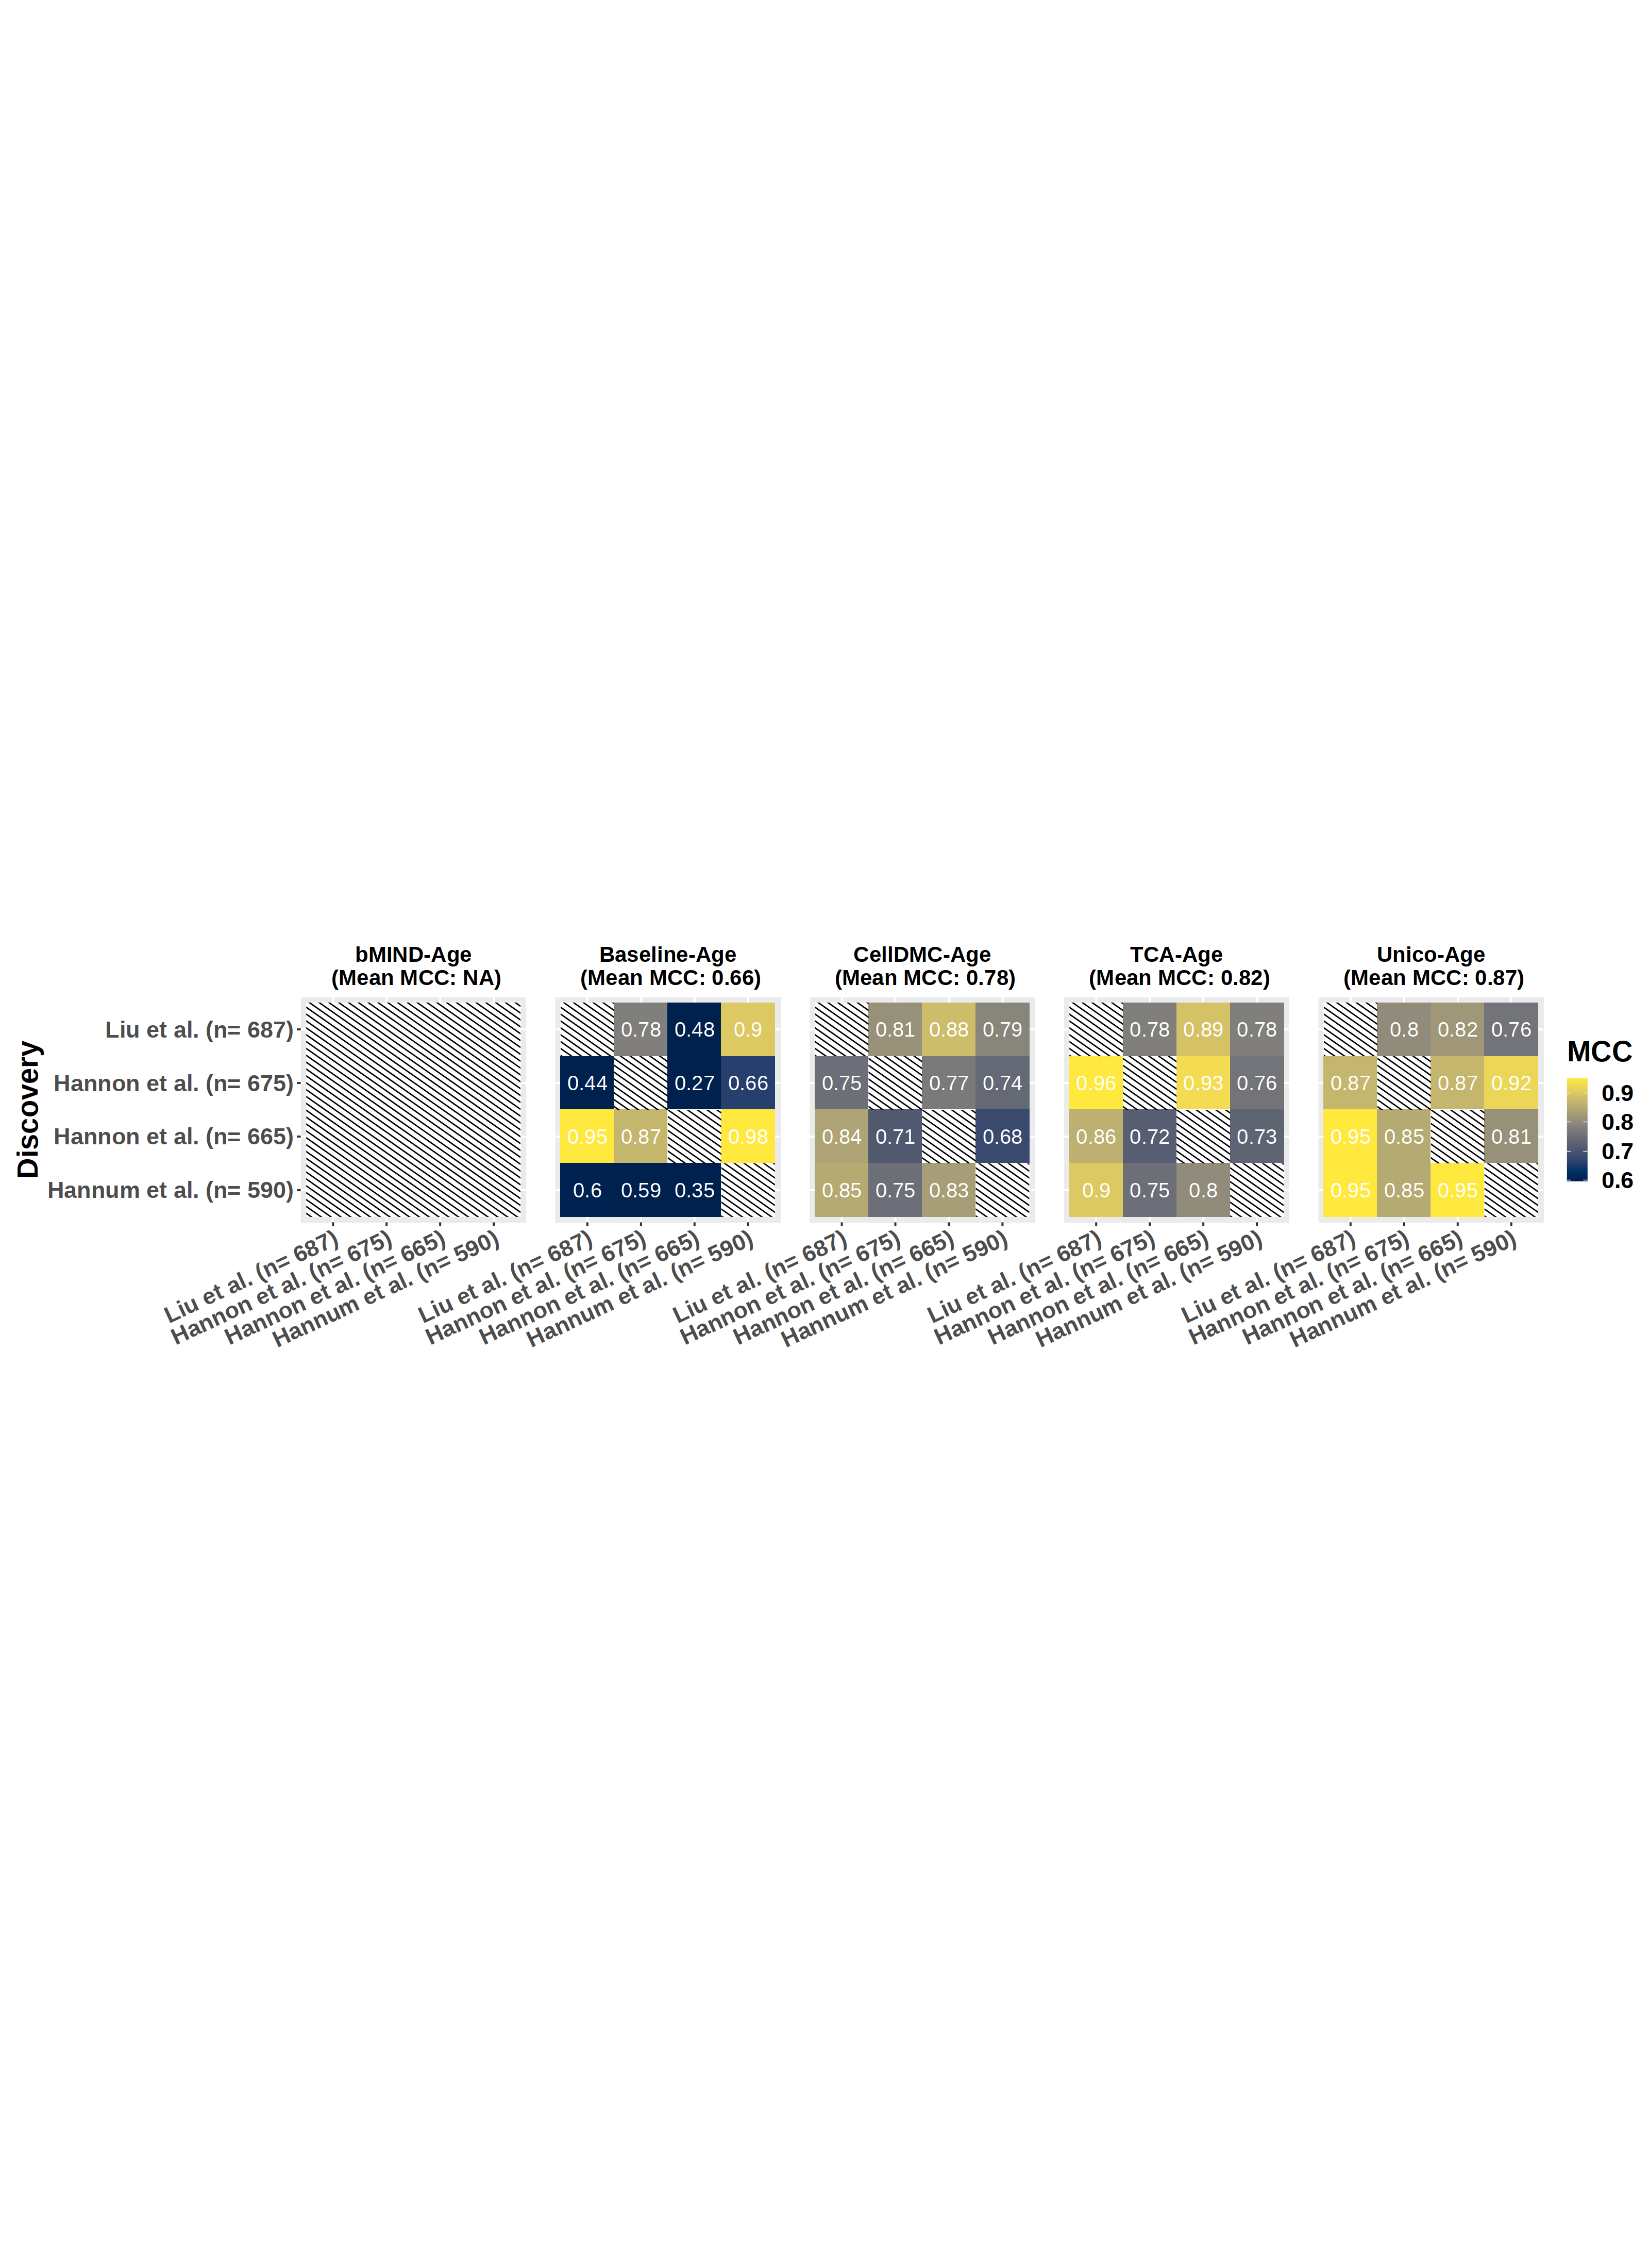

In [14]:
consistency.gender.marg.g = egg::ggarrange(plots=meth.fig.list$consistency.gender.marg.plts,
                                           align = "h",
                                           widths = rep(1, length(meth.fig.list$consistency.gender.marg.plts)),  
                                           debug=F)

consistency.age.marg.g = egg::ggarrange(plots=meth.fig.list$consistency.age.marg.plts,
                                        align = "h",
                                        widths = rep(1, length(meth.fig.list$consistency.age.marg.plts)),  
                                        debug=F)

In [15]:
main.downstream.g = ggarrange(rna.fig.list$regress.g,
                              consistency.gender.marg.g,
                              consistency.age.marg.g,
                              nrow = 3, 
                              heights = c(1.5, 0.75,  1),
                              widths =  c(1,  1, 1),
                              labels = c("a", "b"),
                              font.label = list(size = 30, color = "black", face = "bold", family = NULL)) 

In [16]:
main.downstream.g = main.downstream.g + annotate("text", x = 0.555, y = -0.01, label = 'bold("Validation")', 
                                                 parse = TRUE, size = 7.5) +
                    theme(plot.margin = unit(c(0,0,3,0), "lines"))

#label.size = 20
# xlabel = "Validation"
# main.downstream.g = annotate_figure(main.downstream.g,
#                              bottom = text_grob(xlabel, vjust = 0, color = "black", face = "bold", size = label.size))


Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(y):
“no non-missing arguments to min; returning Inf”
Warning message in max(y):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(y):
“no non-missing arguments to min; returning Inf”
Warning message in max(y):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(y):
“no non-missing arguments to min; returning Inf”
Warning message in max(y):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warnin

Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(y):
“no non-missing arguments to min; returning Inf”
Warning message in max(y):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(y):
“no non-missing arguments to min; returning Inf”
Warning message in max(y):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warning message in max(x):
“no non-missing arguments to max; returning -Inf”
Warning message in min(y):
“no non-missing arguments to min; returning Inf”
Warning message in max(y):
“no non-missing arguments to max; returning -Inf”
Warning message in min(x):
“no non-missing arguments to min; returning Inf”
Warnin

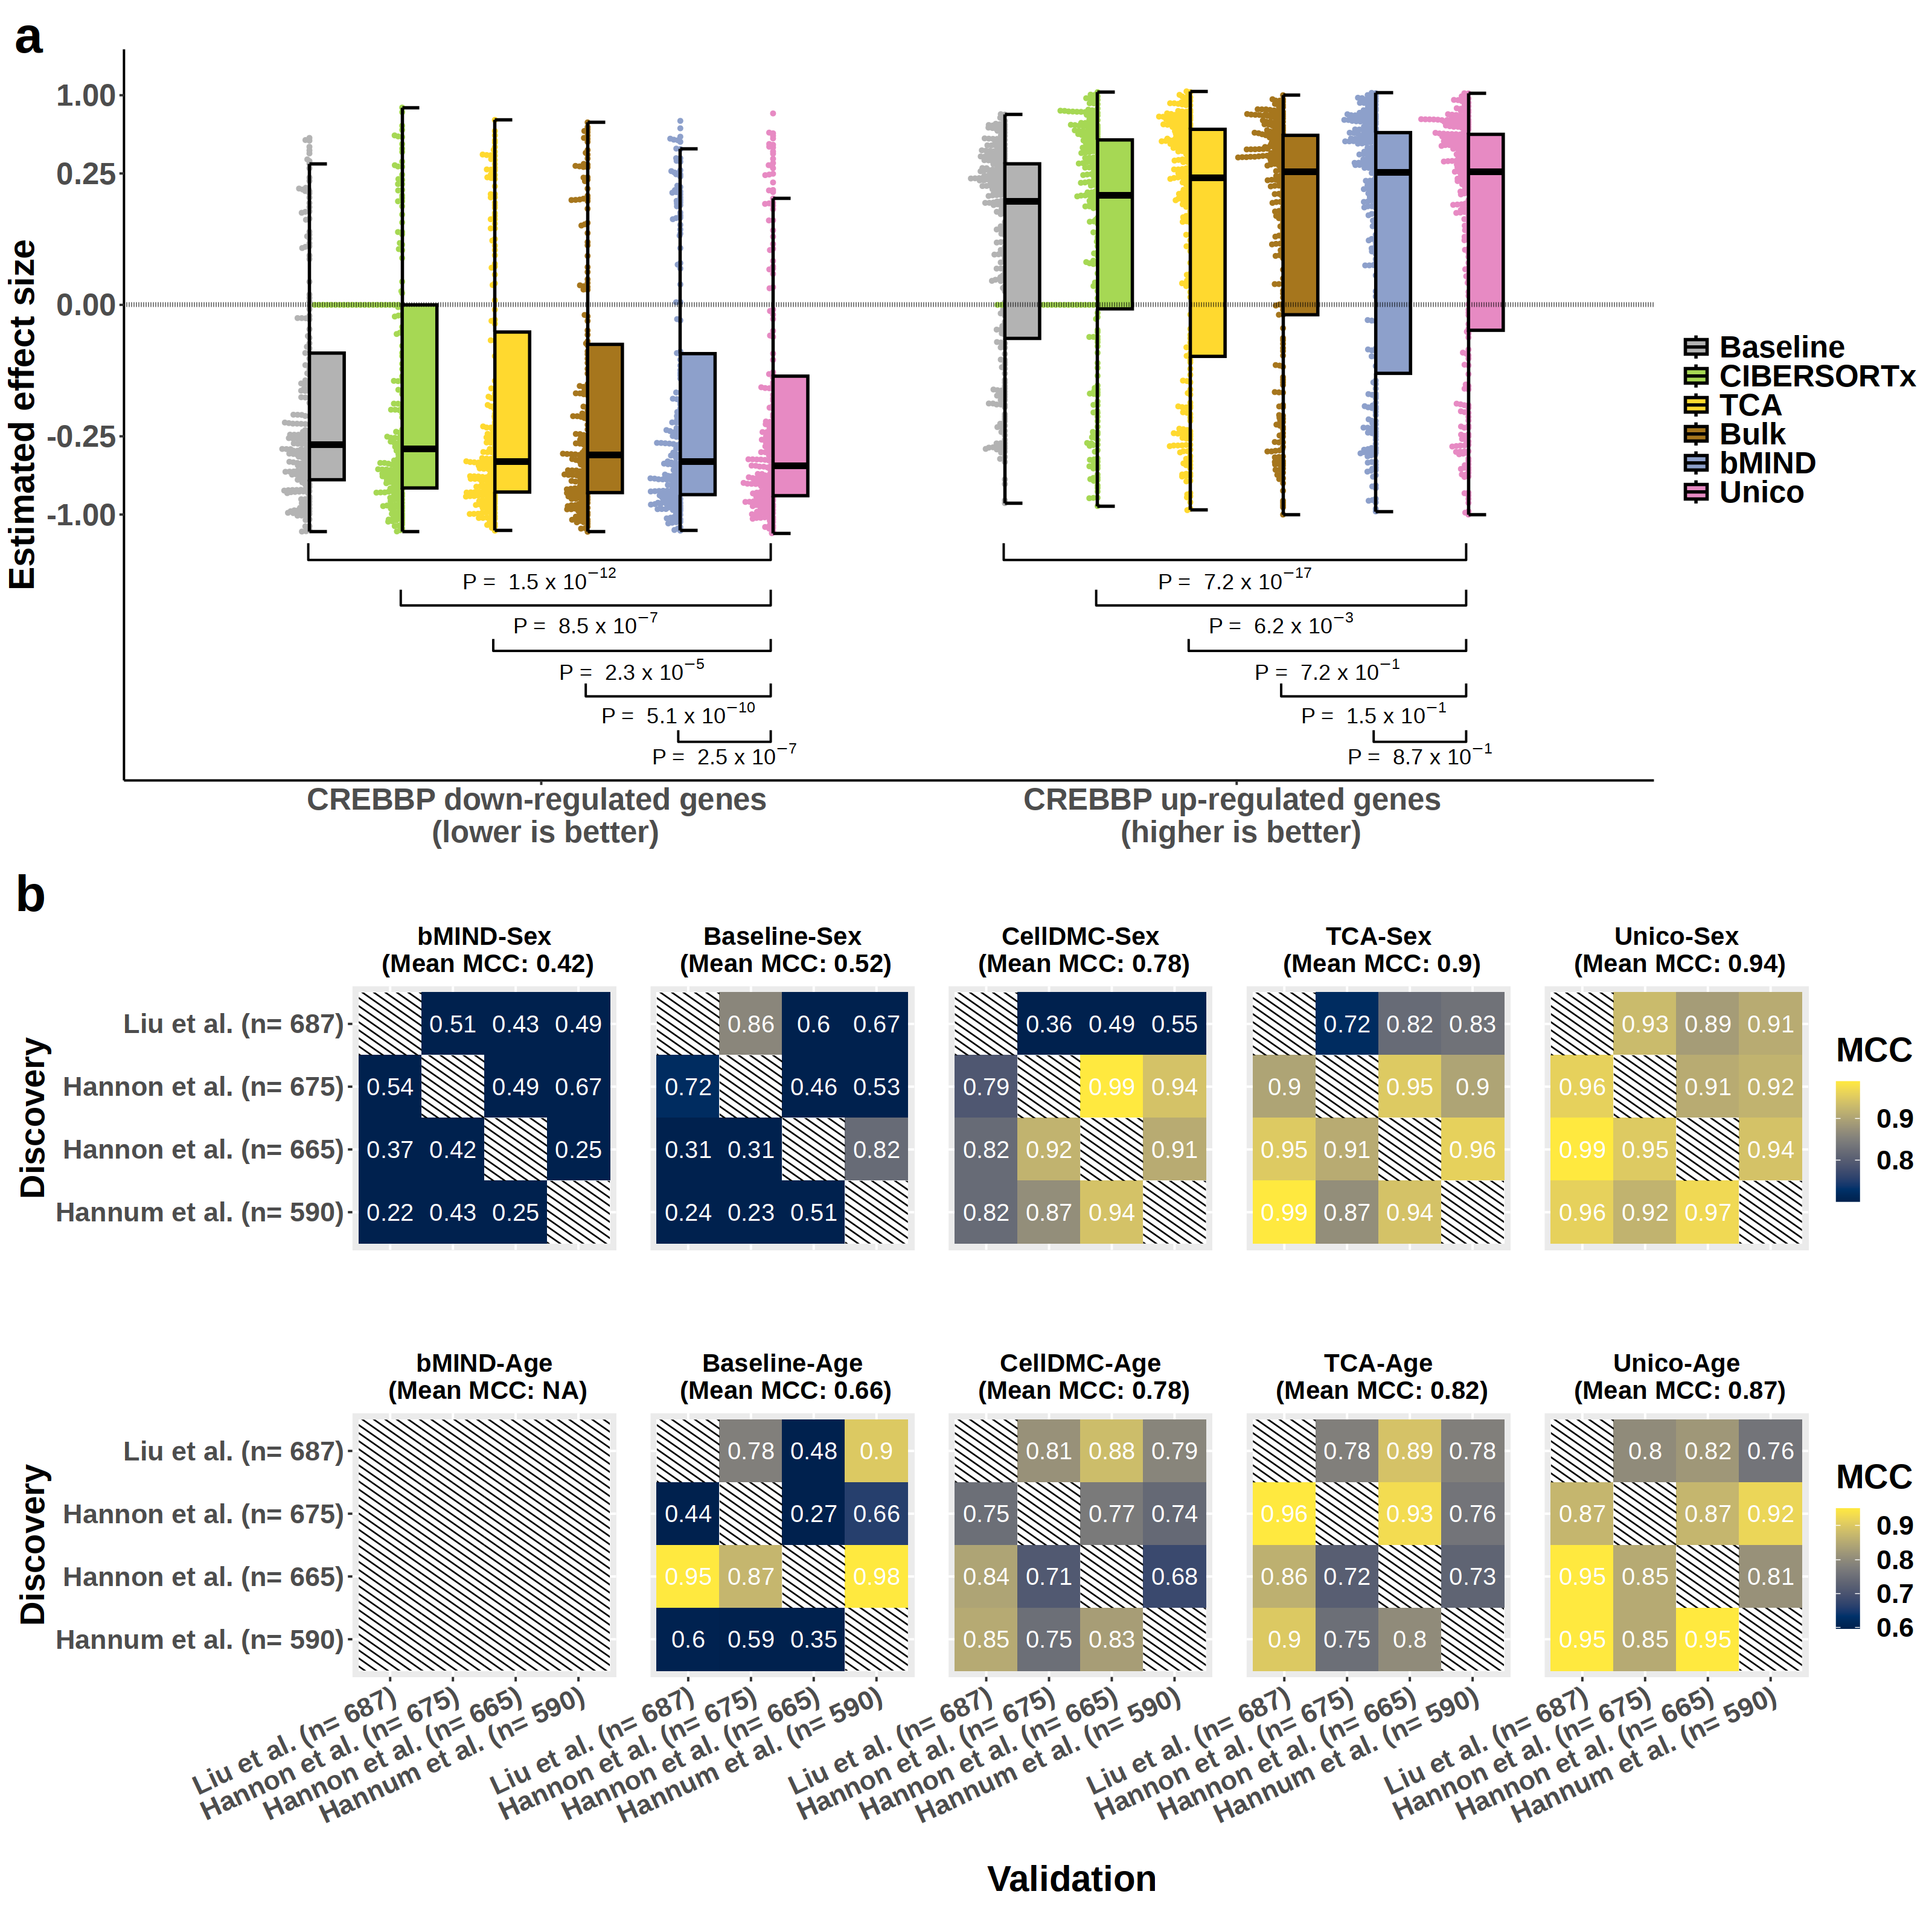

In [17]:
options(repr.plot.width = 16, repr.plot.height = 16, repr.plot.res = 200)
main.downstream.g

In [18]:
ggsave("../Figure/Main.downstream.result.pdf", main.downstream.g,
       bg = 'white',
       device = "pdf", width = 16, height = 16, dpi = 600)